# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Frodewin Grimbert
- Email: frodewing@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import math
from joblib import dump, load
import os

from statsmodels.stats.diagnostic import linear_reset
import statsmodels.api as sm

### Menyiapkan data yang akan diguankan

## Import Data

In [157]:
df = pd.read_csv("data/data.csv", sep=";")
pd.set_option('display.max_columns', None)
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [159]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [160]:
df.duplicated().sum() 

np.int64(0)

In [161]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nationality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [162]:
categorical_columns = ["Marital_status", 
                       "Application_mode",
                       "Course",
                       "Previous_qualification",
                       "Nationality",
                       "Mothers_qualification",
                       "Fathers_qualification",
                       "Mothers_occupation",
                       "Fathers_occupation",
                       "Daytime_evening_attendance",
                       "Displaced",
                       "Educational_special_needs",
                       "Debtor",
                       "Tuition_fees_up_to_date",
                       "Gender",
                       "Scholarship_holder",
                       "International"
                       ]

numerical_columns = ["Application_order",
                     "Age_at_enrollment",
                     "Curricular_units_1st_sem_credited",
                     "Curricular_units_1st_sem_enrolled",
                     "Curricular_units_1st_sem_evaluations",
                     "Curricular_units_1st_sem_approved",
                     "Curricular_units_1st_sem_without_evaluations",
                     "Curricular_units_2nd_sem_credited",
                     "Curricular_units_2nd_sem_enrolled",
                     "Curricular_units_2nd_sem_evaluations",
                     "Curricular_units_2nd_sem_approved",
                     "Curricular_units_2nd_sem_without_evaluations",
                     ]

continous_colums = ["Previous_qualification_grade",
                    "Admission_grade",
                    "Unemployment_rate",
                    "Inflation_rate",
                    "GDP",
                    "Curricular_units_1st_sem_grade",
                    "Curricular_units_2nd_sem_grade",
                    ]

In [163]:
# change categorical variables to object type
for col in categorical_columns:
    df[col] = df[col].astype('object')
# change numerical variables to int type
for col in numerical_columns:
    df[col] = df[col].astype('int')
# change continous variables to float type
for col in continous_colums:
    df[col] = df[col].astype('float')

# check the data types again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nationality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

In [164]:
# check the unique values and its count in each categorical column
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Marital_status:
Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


Unique values in Application_mode:
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64


Unique values in Course:
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64


Unique values in Previous_qualification:
Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64


Unique values in Nationality:
Nationality
1

In [165]:
for col in numerical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Application_order:
Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64


Unique values in Age_at_enrollment:
Age_at_enrollment
18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
42      13
49      13
46      12
48      11
51       7
54       7
53       7
55       5
17       5
52       4
58       3
59       3
60       2
57       2
70       1
61       1
62       1
Name: count, dtype: int64


Unique values in Curricular_units_1st_sem_credited:
Curricular_units_1st_sem_credited
0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
14      15
10      15
13      13
12      12

In [166]:
def group_categories(series, group_map, category_key, default_group='other'):
    """
    Mengelompokkan kategori dalam Series berdasarkan dictionary pemetaan bertingkat
    untuk kategori tertentu (misalnya marital_status, previous_qualification, dll).

    Args:
        series (pd.Series): Kolom kategori (numerik atau teks).
        group_map (dict): Dictionary dengan struktur bertingkat, key adalah kategori grup,
                          dan value adalah dictionary kategori yang harus digabungkan.
        category_key (str): Key dalam group_map yang digunakan untuk memilih kategori yang akan digabungkan.
        default_group (str): Grup default jika nilai tidak ada dalam mapping. Bisa None.

    Returns:
        pd.Series: Kolom baru dengan kategori yang sudah digabung.
    """
    # Menyesuaikan grup yang akan dipakai berdasarkan category_key
    if category_key not in group_map:
        raise ValueError(f"Category key '{category_key}' tidak ditemukan dalam group_map.")
    
    # Ambil grup dari group_map
    group = group_map[category_key]
    
    # Membuat reverse_map dari nested dictionary
    reverse_map = {}
    for key, values in group.items():
        for val in values:
            reverse_map[val] = key
    
    return series.map(lambda x: reverse_map.get(x, default_group))

In [167]:
group_map = {
    'Marital_status': {
        'single': [1],  # Single category
        'married': [2],  # Married category
        'others': [3, 4, 5, 6]  # Other categories
    },
    'Application_mode': {
        'general': [1, 17, 18], 
        'others': [2, 7, 10, 15, 26, 27, 39, 42, 43, 44, 51, 53, 57, 5, 16]
        
    },
    'Course': {
        'health_course': [9500, 9085, 9556],
        'business_and_management_course': [9147, 9991, 9670, 9254],
        'social_services_course': [9238, 8014],
        'design_and_communication_course': [9070, 171, 9773],
        'nature_and_engineering_course': [33, 9119, 9003, 9130],
        'others': [9853]
    },
    'Previous_qualification': {
        'school_edu': [1, 9, 10, 12, 14, 15, 19, 38],
        'higher_edu': [2, 3, 4, 5, 6, 40, 43],
        'vocational_professional': [39, 42]
    },
    'Nationality': {
        'portuguese': [1],
        'others': [2, 6, 11, 13, 14, 62, 103, 105, 32, 100, 17, 21, 22, 24, 25, 26, 41, 101, 108, 109]
    },
    'Mothers_qualification': {
        'higher_edu_degree': [2, 3, 4, 5, 6, 40, 41, 43, 44],
        'school_edu_degree': [1, 9, 19, 37, 38, 30, 36, 29, 10, 11, 12, 14, 26, 27],
        'others': [22, 39, 42, 18, 34, 35],
    },
    'Fathers_qualification': {
        'higher_edu_degree': [2, 3, 4, 5, 6, 40, 41, 43, 44],
        'school_edu_degree': [1, 9, 19, 37, 38, 30, 36, 29, 10, 11, 12, 13, 14, 19, 20, 25, 26, 27],
        'others': [22, 31, 33, 39, 42, 18, 34, 35],
    },
    'Mothers_occupation':{
        'professional_or_expert': [1, 2, 122, 123, 125],
        'inter_tech_or_prof_personnel': [3, 131, 132, 134],
        'administration_or_office':[4, 141, 143, 144],
        'services_or_seller':[5, 151, 152, 153],
        'skilled_worker': [6, 7, 171, 173, 175],
        'unskilled_worker': [9, 191, 192, 193],
        'others': [0, 8, 10, 90, 99, 194]

    },
    'Fathers_occupation': {
        'professional_or_expert': [1, 2, 112, 114, 121, 122, 123, 124, 125],
        'inter_tech_or_prof_personnel': [3, 131, 132, 134, 135],
        'administration_or_office':[4, 141, 143, 144],
        'services_or_seller':[5, 151, 152, 153, 154, 195],
        'skilled_worker': [6, 7, 161, 163, 171, 172, 174, 175],
        'machine_opt_and_installer': [8, 181, 182, 183, 194],
        'armed_forces': [10, 101, 102, 103],
        'unskilled_worker': [9, 192, 193],
        'others': [0, 90, 99, 194]
    },
    
}

df['Marital_status_grouped'] = group_categories(df['Marital_status'], group_map, category_key='Marital_status')
df['Application_mode_grouped'] = group_categories(df['Application_mode'], group_map, category_key='Application_mode')
df['Course_grouped'] = group_categories(df['Course'], group_map, category_key='Course')
df['Previous_qualification_grouped'] = group_categories(df['Previous_qualification'], group_map, category_key='Previous_qualification')
df['Nationality_grouped'] = group_categories(df['Nationality'], group_map, category_key='Nationality')
df['Mothers_qualification_grouped'] = group_categories(df['Mothers_qualification'], group_map, category_key='Mothers_qualification')
df['Fathers_qualification_grouped'] = group_categories(df['Fathers_qualification'], group_map, category_key='Fathers_qualification')
df['Mothers_occupation_grouped'] = group_categories(df['Mothers_occupation'], group_map, category_key='Mothers_occupation')
df['Fathers_occupation_grouped'] = group_categories(df['Fathers_occupation'], group_map, category_key='Fathers_occupation')

In [168]:
numeric_map = {
    'Application_order':{
        '0-1': [0, 1],
        '2-3': [2, 3],
        '3+': [4, 5, 6, 7, 8, 9]
    },
    'Age_at_enrollment': {
        '17-24': list(range(17, 25)),
        '25-30': list(range(25, 31)),
        '31+': list(range(31, 100))
    },
    'Curricular_units_1st_sem_credited': {
        '0': [0],
        '1+': list(range(1,21))
    },
    'Curricular_units_1st_sem_enrolled': {
        '0-4': list(range(0,5)),
        '5-8': list(range(5,9)),
        '9+': list(range(9,31))
    },
    'Curricular_units_1st_sem_evaluations': {
        '0-5': list(range(0, 6)),
        '6-10': list(range(6, 11)),
        '11+': list(range(11, 51))
    },
    'Curricular_units_1st_sem_approved': {
        '0-4': list(range(0,5)),
        '5-8': list(range(5,9)),
        '9+': list(range(9,31))
    },
    'Curricular_units_1st_sem_without_evaluations': {
        '0': [0],
        '1+': list(range(1,16))
    },
    'Curricular_units_2nd_sem_credited': {
        '0': [0],
        '1+': list(range(1,21))
    },
    'Curricular_units_2nd_sem_enrolled': {
        '0-4': list(range(0,5)),
        '5-8': list(range(5,9)),
        '9+': list(range(9,31))
    },
    'Curricular_units_2nd_sem_evaluations': {
        '0-5': list(range(0, 6)),
        '6-10': list(range(6, 11)),
        '11+': list(range(11, 51))
    },
    'Curricular_units_2nd_sem_approved': {
        '0-4': list(range(0,5)),
        '5-8': list(range(5,9)),
        '9+': list(range(9,31))
    },
    'Curricular_units_2nd_sem_without_evaluations': {
        '0': [0],
        '1+': list(range(1,16))
    },
}

df['Application_order_grouped'] = group_categories(df['Application_order'], numeric_map, category_key='Application_order')
df['Age_at_enrollment_grouped'] = group_categories(df['Age_at_enrollment'], numeric_map, category_key='Age_at_enrollment')
df['Curricular_units_1st_sem_credited_grouped'] = group_categories(df['Curricular_units_1st_sem_credited'], numeric_map, category_key='Curricular_units_1st_sem_credited')
df['Curricular_units_1st_sem_enrolled_grouped'] = group_categories(df['Curricular_units_1st_sem_enrolled'], numeric_map, category_key='Curricular_units_1st_sem_enrolled')
df['Curricular_units_1st_sem_evaluations_grouped'] = group_categories(df['Curricular_units_1st_sem_evaluations'], numeric_map, category_key='Curricular_units_1st_sem_evaluations')
df['Curricular_units_1st_sem_approved_grouped'] = group_categories(df['Curricular_units_1st_sem_approved'], numeric_map, category_key='Curricular_units_1st_sem_approved')
df['Curricular_units_1st_sem_without_evaluations_grouped'] = group_categories(df['Curricular_units_1st_sem_without_evaluations'], numeric_map, category_key='Curricular_units_1st_sem_without_evaluations')

df['Curricular_units_2nd_sem_credited_grouped'] = group_categories(df['Curricular_units_2nd_sem_credited'], numeric_map, category_key='Curricular_units_2nd_sem_credited')
df['Curricular_units_2nd_sem_enrolled_grouped'] = group_categories(df['Curricular_units_2nd_sem_enrolled'], numeric_map, category_key='Curricular_units_2nd_sem_enrolled')
df['Curricular_units_2nd_sem_evaluations_grouped'] = group_categories(df['Curricular_units_2nd_sem_evaluations'], numeric_map, category_key='Curricular_units_2nd_sem_evaluations')
df['Curricular_units_2nd_sem_approved_grouped'] = group_categories(df['Curricular_units_2nd_sem_approved'], numeric_map, category_key='Curricular_units_2nd_sem_approved')
df['Curricular_units_2nd_sem_without_evaluations_grouped'] = group_categories(df['Curricular_units_2nd_sem_without_evaluations'], numeric_map, category_key='Curricular_units_2nd_sem_without_evaluations')


In [169]:
grouped_columns = [
    "Marital_status_grouped",
    "Application_mode_grouped",
    "Course_grouped",
    "Previous_qualification_grouped",
    "Nationality_grouped",
    "Mothers_qualification_grouped",
    "Fathers_qualification_grouped",
    "Mothers_occupation_grouped",
    "Fathers_occupation_grouped",
    "Daytime_evening_attendance",
    "Displaced",
    "Educational_special_needs",
    "Debtor",
    "Tuition_fees_up_to_date",
    "Gender",
    "Scholarship_holder",
    "International",

    "Application_order_grouped",
    "Age_at_enrollment_grouped",
    "Curricular_units_1st_sem_credited_grouped",
    "Curricular_units_1st_sem_enrolled_grouped",
    "Curricular_units_1st_sem_evaluations_grouped",
    "Curricular_units_1st_sem_approved_grouped",
    "Curricular_units_1st_sem_without_evaluations_grouped",

    "Curricular_units_2nd_sem_credited_grouped",
    "Curricular_units_2nd_sem_enrolled_grouped",
    "Curricular_units_2nd_sem_evaluations_grouped",
    "Curricular_units_2nd_sem_approved_grouped",
    "Curricular_units_2nd_sem_without_evaluations_grouped"
]

for col in grouped_columns:
    print(f"{col}:")
    value_counts = df[col].value_counts()
    print(value_counts)
    print(f"Sum of values: {value_counts.sum()}\n")


Marital_status_grouped:
Marital_status_grouped
single     3919
married     379
others      126
Name: count, dtype: int64
Sum of values: 4424

Application_mode_grouped:
Application_mode_grouped
general    2704
others     1720
Name: count, dtype: int64
Sum of values: 4424

Course_grouped:
Course_grouped
health_course                      1189
business_and_management_course     1168
design_and_communication_course     772
social_services_course              570
nature_and_engineering_course       533
others                              192
Name: count, dtype: int64
Sum of values: 4424

Previous_qualification_grouped:
Previous_qualification_grouped
school_edu                 3949
vocational_professional     255
higher_edu                  220
Name: count, dtype: int64
Sum of values: 4424

Nationality_grouped:
Nationality_grouped
portuguese    4314
others         110
Name: count, dtype: int64
Sum of values: 4424

Mothers_qualification_grouped:
Mothers_qualification_grouped
school_edu_degree

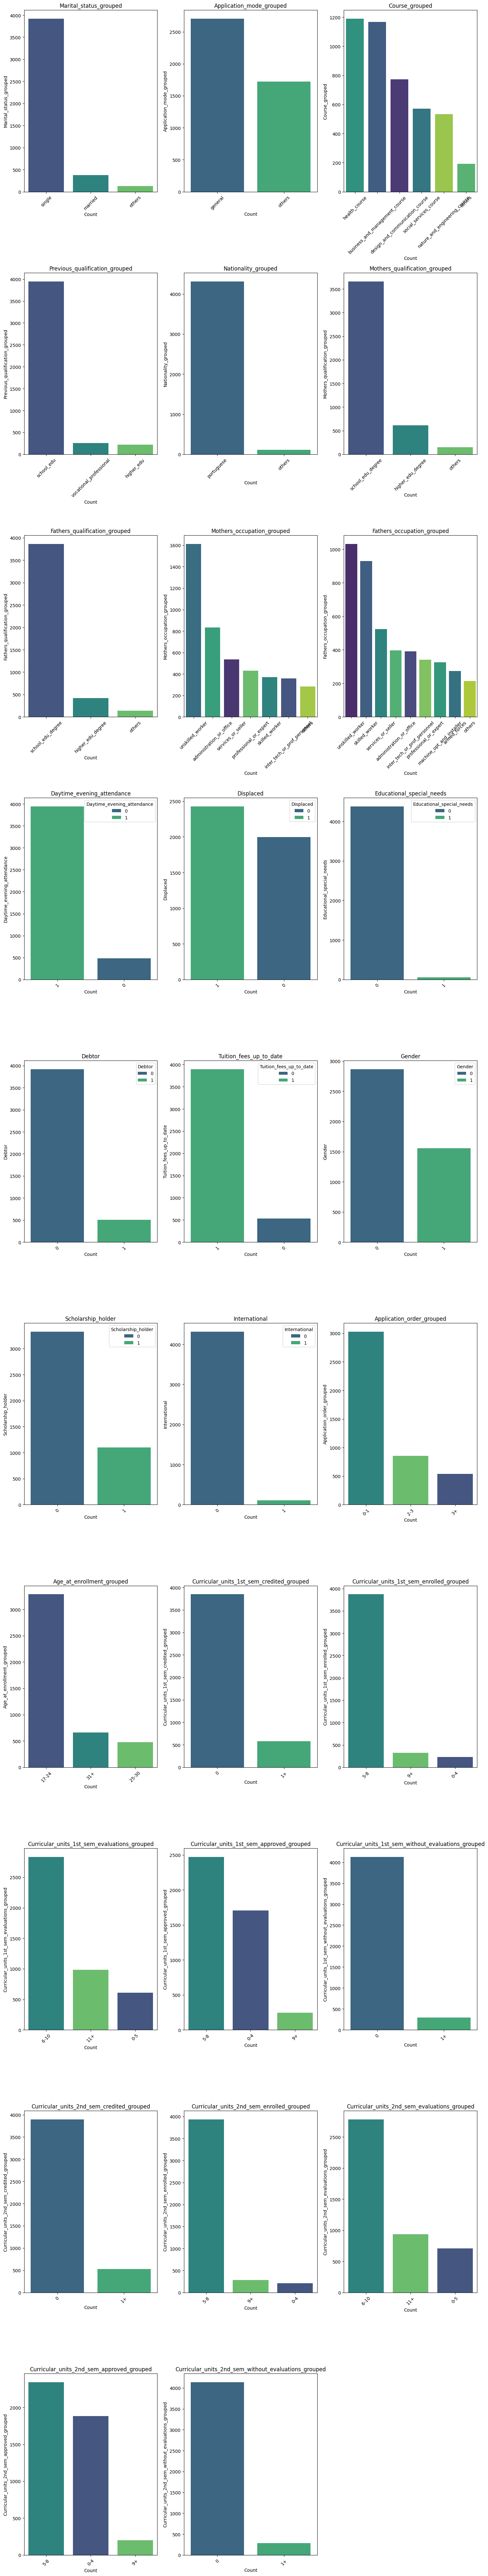

In [170]:
# check the value of each categorical columns to see the characteristic of data
plt.figure(figsize=(15, math.ceil(len(grouped_columns) / 3) * 8))

# Loop through each column in grouped_columns
for i, col in enumerate(grouped_columns, 1):
    plt.subplot(math.ceil(len(grouped_columns) / 3), 3, i)  # Create a subplot for each column
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis", hue=col)
    plt.title(f"{col}")
    plt.xlabel("Count")
    plt.xticks(rotation=45)
    plt.ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

rata-rata dari Previous_qualification_grade: 132.61331
rata-rata dari Admission_grade: 126.97812
rata-rata dari Unemployment_rate: 11.56614
rata-rata dari Inflation_rate: 1.22803
rata-rata dari GDP: 0.00197
rata-rata dari Curricular_units_1st_sem_grade: 10.64082
rata-rata dari Curricular_units_2nd_sem_grade: 10.23021


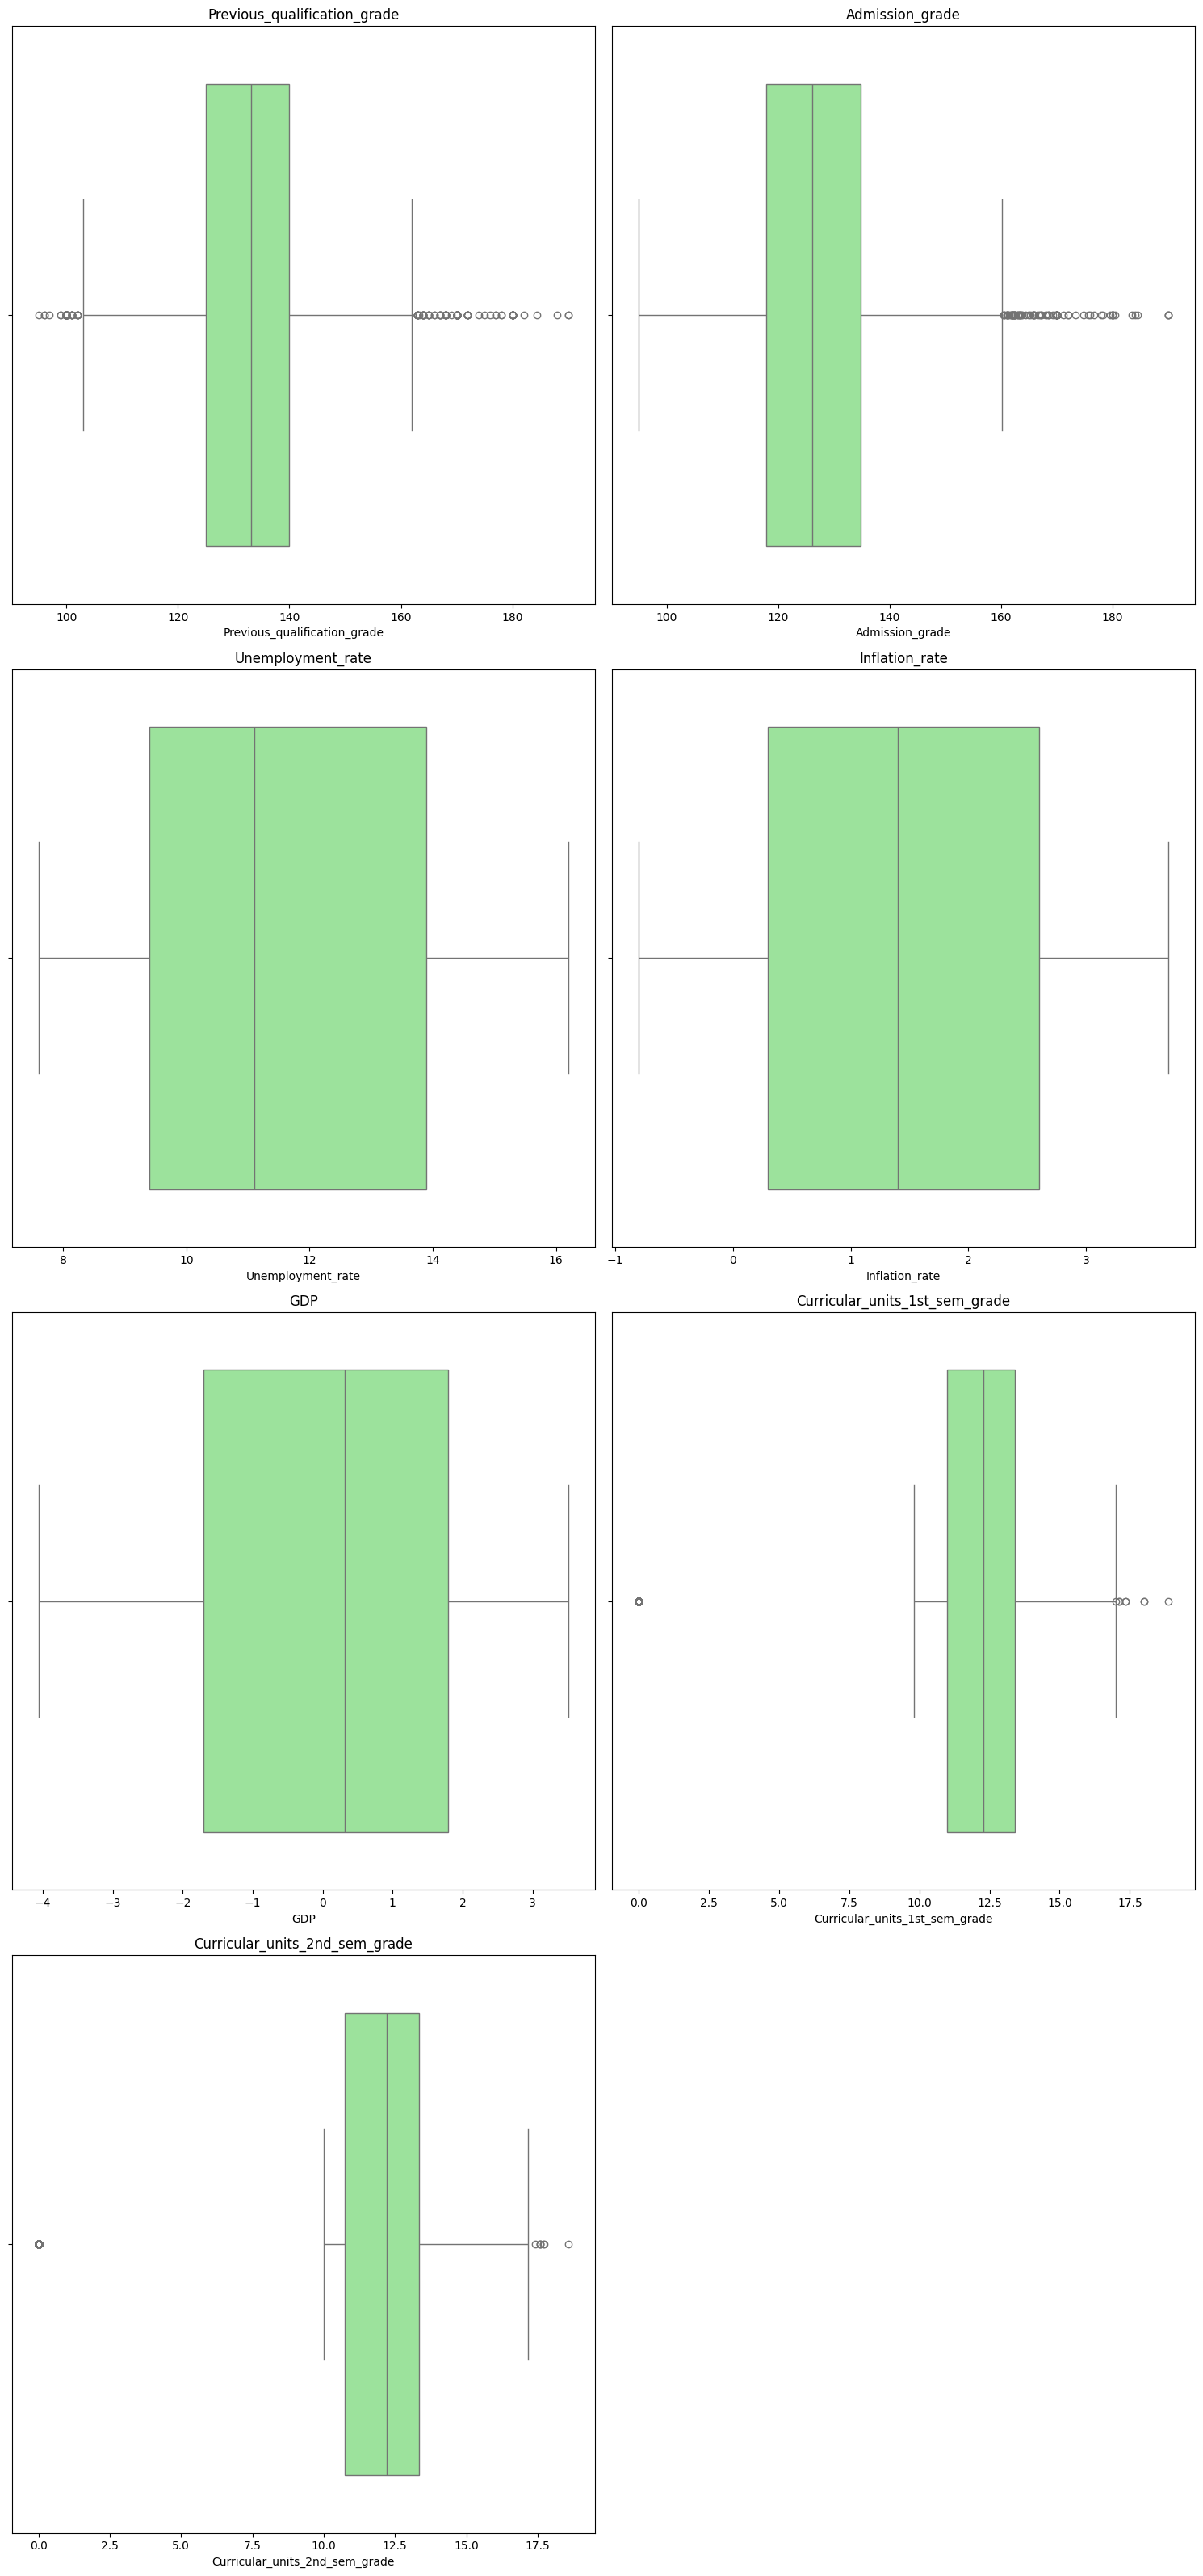

In [171]:
for col in continous_colums:
    print(f"rata-rata dari {col}: {round(df[col].mean(), 5)}")

plt.figure(figsize=(15, math.ceil(len(continous_colums) / 2) * 8))
for i, col in enumerate(continous_colums, 1):
    plt.subplot(math.ceil(len(continous_colums) / 2), 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.tight_layout()

# Adjust layout to prevent overlap
plt.tight_layout()

Berdasarkan pengamatan terhadap kolom-kolom kategorikal, kita dapat melihat beberapa karakteristik mahasiswa di Jaya-Jaya Institut. Beberapa temuan penting yang menonjol antara lain:
- Kebangsaan (Nationality): Mayoritas mahasiswa berasal dari `Portugal`, yang secara signifikan mendominasi dibandingkan negara lain.
- Kualifikasi Pendidikan Orang Tua (mayoritas hanya sampai `pendidikan dasar atau menengah`):
    - Ibu: Kode yang paling banyak muncul adalah 1 (sebanyak 1.069 mahasiswa), yang menunjukkan bahwa sebagian besar ibu mahasiswa memiliki tingkat pendidikan Secondary Education - 12th Year of Schooling or Equivalent.
    - Ayah: Kode yang paling dominan adalah 37 (sebanyak 1.209 mahasiswa), yang berarti banyak ayah mahasiswa hanya menyelesaikan Basic Education 1st Cycle (setara kelas 4 atau 5 SD).
- Baik ayah maupun ibu paling banyak bekerja pada kategori dengan kode 9, yaitu `Unskilled Workers (Pekerja Tidak Terampil)`. Jumlah ibu dalam kategori ini mencapai 1.577, dan ayah sebanyak 1.010.
- Status Mahasiswa: Sebagian besar mahasiswa terdaftar sebagai `Displaced Person`, yang menunjukkan bahwa mereka kemungkinan besar adalah individu yang pernah mengalami perpindahan paksa akibat kondisi tertentu seperti konflik atau bencana.
- Jenis Kelamin: Komposisi mahasiswa didominasi oleh `perempuan` (mahasiswi).
- Sebagian besar mahasiswa mendaftar di Jaya-Jaya Institut dengan memilih program studi mereka pada `urutan pertama atau kedua` (kategori Application Order 0–1), dengan pilihan kedua (1) sebagai yang paling dominan. 
- Kelompok usia terbanyak berada pada rentang 18–24 tahun. 
- Pada semester pertama maupun kedua, mayoritas mahasiswa tidak memiliki mata kuliah yang dikonversi dari kredit sebelumnya (kategori` Credited = 0`)
- Mahasiswa umumnya mengambil antara `5 hingga 8` mata kuliah per semester. 
- Jumlah evaluasi (ujian) yang diikuti juga mayoritas berada pada rentang `6–10 per semester`. 
- Dari segi kelulusan (approved) maupun nilai akhir (grade), tidak terdapat perbedaan mencolok antara semester pertama dan kedua. 
- Distribusi mahasiswa yang tidak mengikuti evaluasi (ujian) pada satu atau lebih mata kuliah di semester pertama maupun kedua juga relatif serupa, dengan sebagian besar mahasiswa mengikuti semua evaluasi (kategori `without evaluations = 0`).
- Rata-rata nilai admission maupun previous qualification berada pada 126.97 pada admission dan 132.61 pada admission

Mengecek Pengaruh masing-masing kolom terhadap status seseorang dropout atau tidak

In [172]:
print("---------------------------by finance------------------------------------")
print(f"{df.groupby("Status")["Debtor"].value_counts()}\n")
print(f"{df.groupby("Status")["Tuition_fees_up_to_date"].value_counts()}\n")
print(f"{df.groupby("Status")["Educational_special_needs"].value_counts()}\n")
print(f"{df.groupby("Status")["Scholarship_holder"].value_counts()}\n")

print("---------------------------by identity------------------------------------")
print(f"{df.groupby("Status")["Displaced"].value_counts()}\n")
print(f"{df.groupby("Status")["Nationality_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["International"].value_counts()}\n")
print(f"{df.groupby("Status")["Gender"].value_counts()}\n")
print(f"{df.groupby("Status")["Marital_status_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Age_at_enrollment_grouped"].value_counts()}\n") 

print("---------------------------by academic performance------------------------------------")
print(f"{df.groupby("Status")["Previous_qualification_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Curricular_units_1st_sem_grade"].mean()}\n")
print(f"{df.groupby("Status")["Curricular_units_2nd_sem_grade"].mean()}\n")
print(f"{df.groupby("Status")["Curricular_units_1st_sem_credited_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Curricular_units_2nd_sem_credited_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Curricular_units_1st_sem_enrolled_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Curricular_units_2nd_sem_enrolled_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Curricular_units_1st_sem_evaluations_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Curricular_units_2nd_sem_evaluations_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Curricular_units_1st_sem_approved_grouped"].value_counts()}\n") 
print(f"{df.groupby("Status")["Curricular_units_2nd_sem_approved_grouped"].value_counts()}\n") 
print(f"{df.groupby("Status")["Curricular_units_1st_sem_without_evaluations_grouped"].value_counts()}\n") 
print(f"{df.groupby("Status")["Curricular_units_2nd_sem_without_evaluations_grouped"].value_counts()}\n") 

print("---------------------------by learning choice------------------------------------")
print(f"{df.groupby("Status")["Application_order"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)}\n")
print(f"{df.groupby("Status")["Course_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Application_mode_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Daytime_evening_attendance"].value_counts()}\n")

print("---------------------------by parents background------------------------------------")
print(f"{df.groupby("Status")["Mothers_qualification_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Fathers_qualification_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Mothers_occupation_grouped"].value_counts()}\n")
print(f"{df.groupby("Status")["Fathers_occupation_grouped"].value_counts()}\n")

---------------------------by finance------------------------------------
Status    Debtor
Dropout   0         1109
          1          312
Enrolled  0          704
          1           90
Graduate  0         2108
          1          101
Name: count, dtype: int64

Status    Tuition_fees_up_to_date
Dropout   1                           964
          0                           457
Enrolled  1                           752
          0                            42
Graduate  1                          2180
          0                            29
Name: count, dtype: int64

Status    Educational_special_needs
Dropout   0                            1404
          1                              17
Enrolled  0                             783
          1                              11
Graduate  0                            2186
          1                              23
Name: count, dtype: int64

Status    Scholarship_holder
Dropout   0                     1287
          1               

Terima kasih telah membagikan seluruh tabulasi data berdasarkan berbagai dimensi. Ini adalah rangkuman tabulasi silang (cross-tabulation) dari data mahasiswa berdasarkan status akhir mereka (`Dropout`, `Enrolled`, `Graduate`) terhadap berbagai fitur yang dikelompokkan, mencakup:

### 1. **Faktor Finansial**

* **Debtor & Tuition\_fees\_up\_to\_date:** Proporsi dropout lebih tinggi pada mahasiswa yang **berutang** dan **tidak membayar uang kuliah tepat waktu**.
* **Scholarship\_holder:** Mayoritas mahasiswa **graduate** adalah pemegang beasiswa (**835 dari 2209**), sementara dropout didominasi non-pemegang beasiswa.

### 2. **Identitas**

* **Displaced students:** Mahasiswa displaced cenderung memiliki tingkat dropout yang cukup tinggi.
* **Nationality & International:** Mahasiswa **non-Portugis atau internasional** jumlahnya kecil tapi proporsi dropout lebih tinggi.
* **Gender:** Laki-laki (1) lebih banyak dropout dibanding perempuan.
* **Marital\_status:** Seseorang yang telah keluar dari status lajang memiliki tingkat dropout lebih tinggi
* **Age group:** semakin tinggi umur seseorang, semakin tinggi kecenderungan untuk dropout.

### 3. **Akademik**
* **Grades dan Units Approved:**
  * Dropout umumnya berada pada kelompok nilai **rendah (0–13)**.
  * Jumlah unit yang disetujui semester 1 & 2 lebih sedikit pada yang dropout.
* **Tanpa evaluasi:** Dropout lebih banyak memiliki unit **tanpa evaluasi**.

### 4. **Pilihan Studi**
* **Course group:** Dropout terbanyak di program **manajemen, teknik, dan desain**.
* **Application mode:** Mayoritas dropout dari **jalur pendaftaran ‘others’**, bukan general.
* **Attendance time:** Sebagian besar dropout berasal dari **kelas malam (1)**.

### 5. **Latar Belakang Orang Tua**
* **Education orang tua:** Dropout dominan dari orang tua dengan **pendidikan sekolah dasar/sederajat**.
* **Occupation:**
  * Orang tua dari kelompok **pekerja tidak terampil (unskilled)** dan **skilled worker** mendominasi dropout.
  * Ada juga proporsi dropout tinggi dari kelompok **others** yang tidak jelas profesinya.

---

### Insight Sementara berdasarkan Data Understanding:
Banyak variabel yang memperlihatkan pola cukup jelas antara mahasiswa yang dropout dan yang graduate, seperti:
* Ketepatan membayar uang kuliah
* Status beasiswa
* Performa akademik (nilai dan kelulusan mata kuliah)
* Pendidikan dan pekerjaan orang tua
* Waktu belajar (malam vs siang)
* Jalur masuk
* Status
* Umur

we will use logistic regression again to get a simple yet effective intepretation to get how big every variable affect the target variable three assumption must be met, linearity of logit, independence of observation (means no duplicate), no multicolinearity between variable most importantly, of course the target variable are binary.

we already checked that in this data there are no missing value or duplicate, so the independence of observation are met, now  we must check the multicolinearity and linearity of logit. We start first with checking multicolinearity

Before that, we will drop column of numerical since we already binned them to categorical column to simpify the data, and we also simplify the status become 2 big category, dropout (1) and non-dropout (0) (graduate, enrolled)

#### Data Understanding With Logistic Regression

In [173]:
categorical_columns_without_binary = [
    "Marital_status", 
    "Application_mode",
    "Course",
    "Previous_qualification",
    "Nationality",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
]

new_df = df.drop(columns=categorical_columns_without_binary+numerical_columns)
new_df = new_df[new_df['Status'].isin(['Dropout', 'Graduate'])]
group_map.update({
    'Status': {
        0: ['Graduate'],
        1: ['Dropout']
    }
})
new_df['dropout'] = group_categories(new_df['Status'], group_map, category_key='Status')
new_df.drop(columns=['Status'], inplace=True)
new_df.head()

,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Marital_status_grouped,Application_mode_grouped,Course_grouped,Previous_qualification_grouped,Nationality_grouped,Mothers_qualification_grouped,Fathers_qualification_grouped,Mothers_occupation_grouped,Fathers_occupation_grouped,Application_order_grouped,Age_at_enrollment_grouped,Curricular_units_1st_sem_credited_grouped,Curricular_units_1st_sem_enrolled_grouped,Curricular_units_1st_sem_evaluations_grouped,Curricular_units_1st_sem_approved_grouped,Curricular_units_1st_sem_without_evaluations_grouped,Curricular_units_2nd_sem_credited_grouped,Curricular_units_2nd_sem_enrolled_grouped,Curricular_units_2nd_sem_evaluations_grouped,Curricular_units_2nd_sem_approved_grouped,Curricular_units_2nd_sem_without_evaluations_grouped,dropout
0,1,122.0,127.3,1,0,0,1,1,0,0,0.000000,0.000000,10.8,1.4,1.74,single,general,design_and_communication_course,school_edu,portuguese,school_edu_degree,school_edu_degree,services_or_seller,unskilled_worker,3+,17-24,0,0-4,0-5,0-4,0,0,0-4,0-5,0-4,0,1
1,1,160.0,142.5,1,0,0,0,1,0,0,14.000000,13.666667,13.9,-0.3,0.79,single,others,business_and_management_course,school_edu,portuguese,school_edu_degree,higher_edu_degree,inter_tech_or_prof_personnel,inter_tech_or_prof_personnel,0-1,17-24,0,5-8,6-10,5-8,0,0,5-8,6-10,5-8,0,0
2,1,122.0,124.8,1,0,0,0,1,0,0,0.000000,0.000000,10.8,1.4,1.74,single,general,design_and_communication_course,school_edu,portuguese,school_edu_degree,school_edu_degree,unskilled_worker,unskilled_worker,3+,17-24,0,5-8,0-5,0-4,0,0,5-8,0-5,0-4,0,1
3,1,122.0,119.6,1,0,0,1,0,0,0,13.428571,12.400000,9.4,-0.8,-3.12,single,general,design_and_communication_course,school_edu,portuguese,school_edu_degree,school_edu_degree,services_or_seller,inter_tech_or_prof_personnel,2-3,17-24,0,5-8,6-10,5-8,0,0,5-8,6-10,5-8,0,0
4,0,100.0,141.5,0,0,0,1,0,0,0,12.333333,13.000000,13.9,-0.3,0.79,married,others,social_services_course,school_edu,portuguese,school_edu_degree,school_edu_degree,unskilled_worker,unskilled_worker,0-1,31+,0,5-8,6-10,5-8,0,0,5-8,6-10,5-8,0,0


#### Checking Multicolinearity

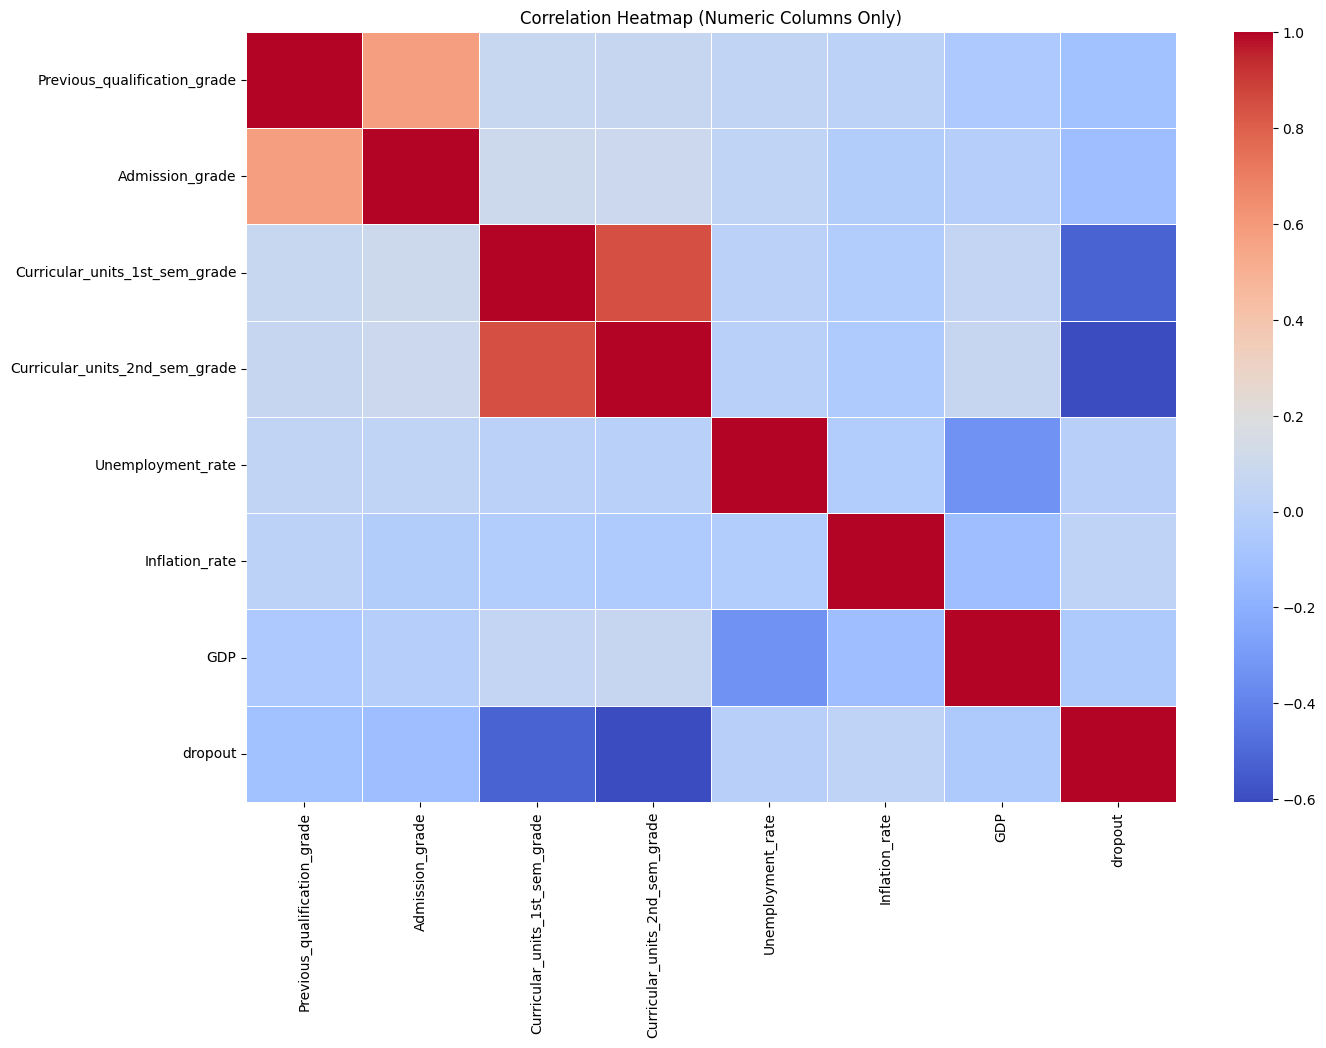

,Feature1,Feature2,Correlation
19,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,0.845864
26,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_grade,0.845864
59,dropout,Curricular_units_2nd_sem_grade,-0.605350
31,Curricular_units_2nd_sem_grade,dropout,-0.605350
1,Previous_qualification_grade,Admission_grade,0.577241
8,Admission_grade,Previous_qualification_grade,0.577241
23,Curricular_units_1st_sem_grade,dropout,-0.519927
58,dropout,Curricular_units_1st_sem_grade,-0.519927
38,Unemployment_rate,GDP,-0.341742
52,GDP,Unemployment_rate,-0.341742


In [174]:
# Calculate the correlation matrix for numeric columns only
numeric_correlation_matrix = new_df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

# Flatten the correlation matrix and sort by the absolute value of correlation
correlation_pairs = numeric_correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
correlation_pairs = correlation_pairs[correlation_pairs['Feature1'] != correlation_pairs['Feature2']]
correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()
sorted_correlation = correlation_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Print the top correlations
sorted_correlation[['Feature1', 'Feature2', 'Correlation']].head(15)

As the correlation above, we will drop sem_1_grade since it already can be covered by sem 2 grade

In [175]:
new_df = new_df.drop(columns=['Curricular_units_2nd_sem_grade'])
continous_colums.remove('Curricular_units_2nd_sem_grade')

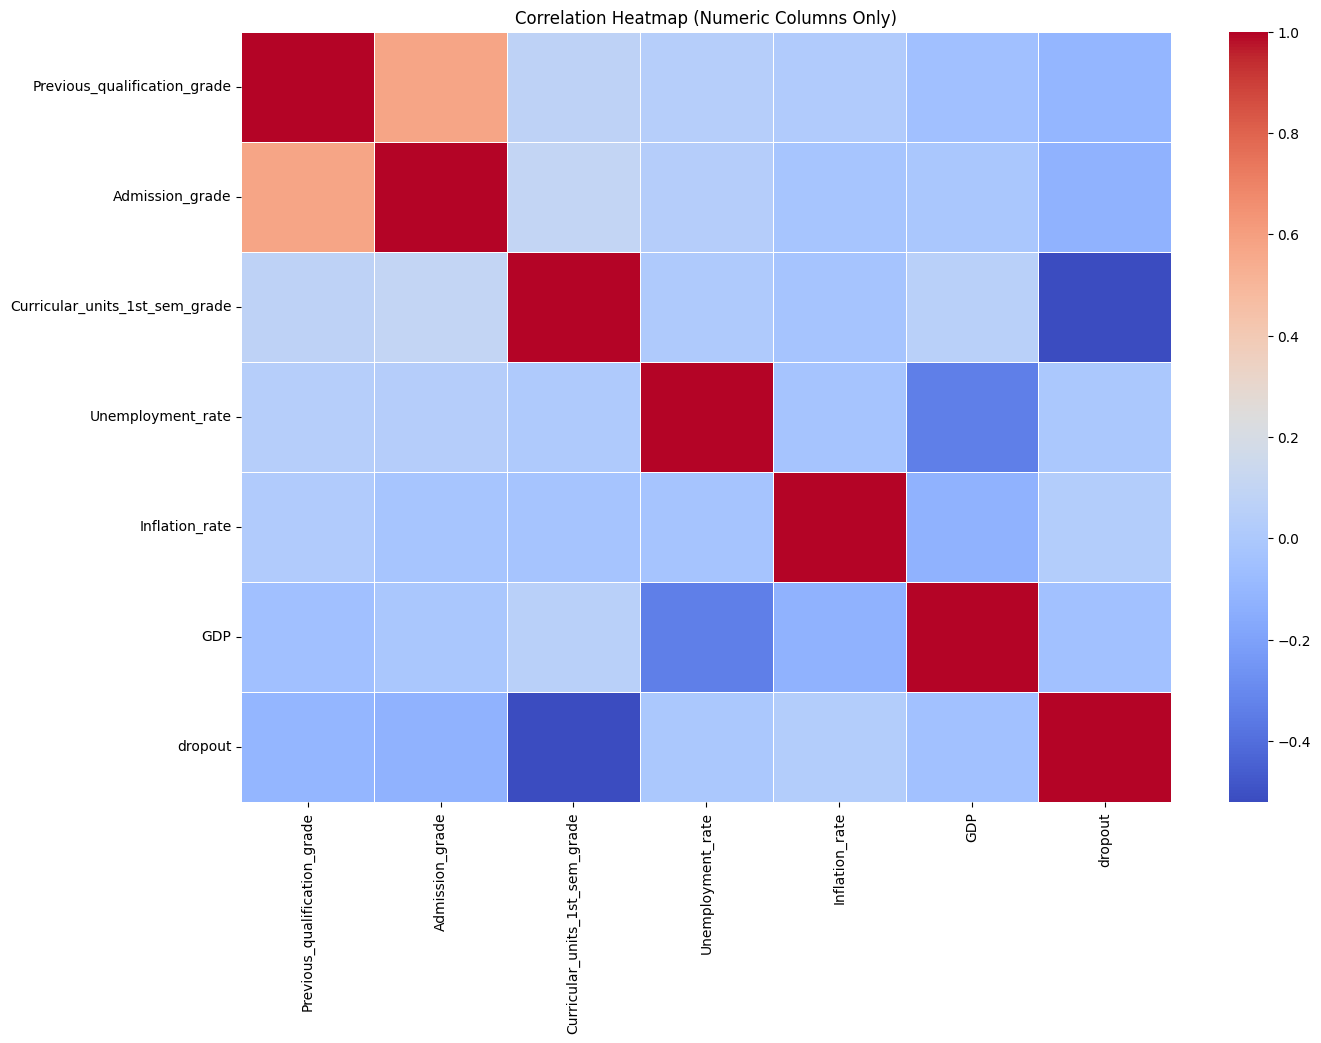

,Feature1,Feature2,Correlation
1,Previous_qualification_grade,Admission_grade,0.577241
7,Admission_grade,Previous_qualification_grade,0.577241
44,dropout,Curricular_units_1st_sem_grade,-0.519927
20,Curricular_units_1st_sem_grade,dropout,-0.519927
26,Unemployment_rate,GDP,-0.341742
38,GDP,Unemployment_rate,-0.341742
43,dropout,Admission_grade,-0.128058
13,Admission_grade,dropout,-0.128058
39,GDP,Inflation_rate,-0.125789
33,Inflation_rate,GDP,-0.125789


In [176]:
# Calculate the correlation matrix for numeric columns only
numeric_correlation_matrix = new_df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

# Flatten the correlation matrix and sort by the absolute value of correlation
correlation_pairs = numeric_correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
correlation_pairs = correlation_pairs[correlation_pairs['Feature1'] != correlation_pairs['Feature2']]
correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()
sorted_correlation = correlation_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Print the top correlations
sorted_correlation[['Feature1', 'Feature2', 'Correlation']].head(15)

there are no more high correlation (higher than |0.7| reference of rule of thumb in statistic), now we will checking with vif value to make it more sure after we encoding the categorical columns one

#### Checking Linearity between Continous Variable

C:\Users\USER\AppData\Local\Temp\ipykernel_17540\3759313781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("bin")[target].mean()  # rata-rata target = probabilitas


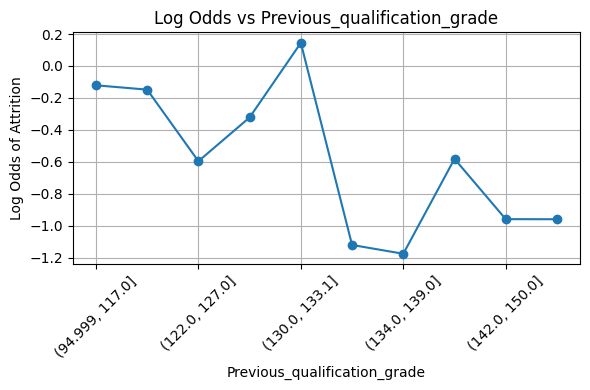

C:\Users\USER\AppData\Local\Temp\ipykernel_17540\3759313781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("bin")[target].mean()  # rata-rata target = probabilitas


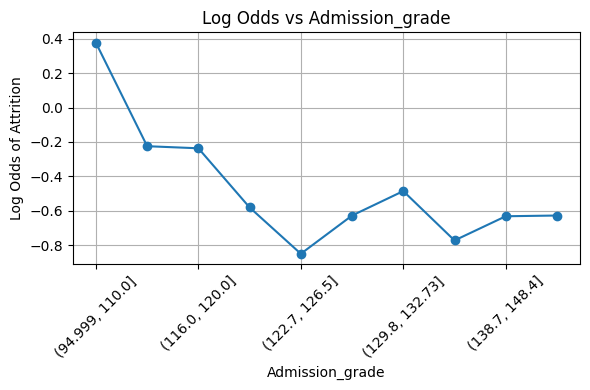

C:\Users\USER\AppData\Local\Temp\ipykernel_17540\3759313781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("bin")[target].mean()  # rata-rata target = probabilitas


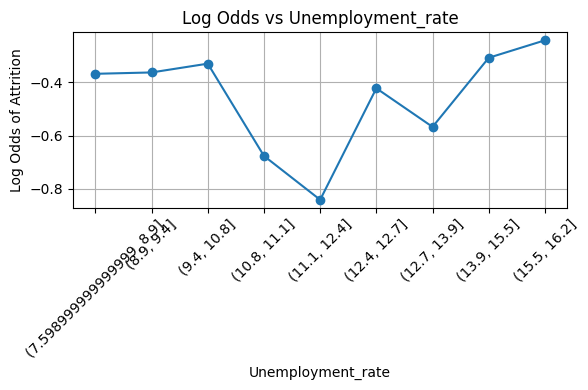

C:\Users\USER\AppData\Local\Temp\ipykernel_17540\3759313781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("bin")[target].mean()  # rata-rata target = probabilitas


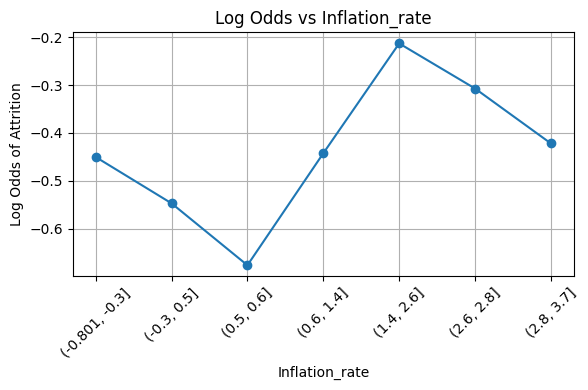

C:\Users\USER\AppData\Local\Temp\ipykernel_17540\3759313781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("bin")[target].mean()  # rata-rata target = probabilitas


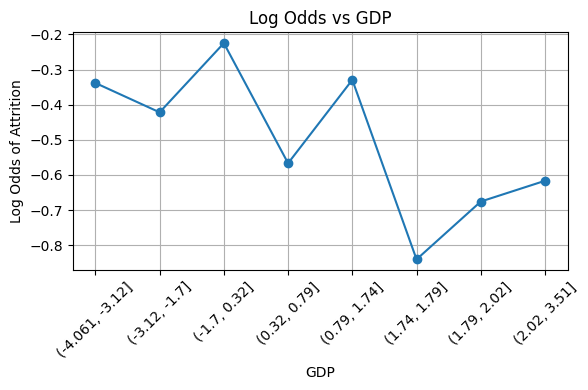

C:\Users\USER\AppData\Local\Temp\ipykernel_17540\3759313781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("bin")[target].mean()  # rata-rata target = probabilitas


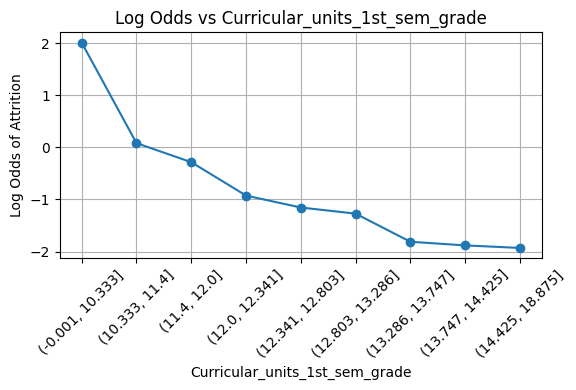

In [177]:
# selanjutnya, cek hubungan linearitas antara target variable terhadap continous variable
def plot_log_odds(df, continuous_columns, target):
    for col in continuous_columns:
        # Binning untuk memperhalus visualisasi
        df["bin"] = pd.qcut(df[col], q=10, duplicates='drop')
        grouped = df.groupby("bin")[target].mean()  # rata-rata target = probabilitas
        log_odds = np.log(grouped / (1 - grouped))  # hitung log odds

        plt.figure(figsize=(6, 4))
        log_odds.plot(marker='o')
        plt.title(f'Log Odds vs {col}')
        plt.xlabel(col)
        plt.ylabel('Log Odds of Attrition')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Drop kolom bin setelah selesai
    df.drop(columns="bin", inplace=True)

plot_log_odds(new_df, continous_colums, 'dropout')

In [178]:
X = new_df[continous_colums]
y = new_df['dropout']

X = sm.add_constant(X)  # tambahkan intercept jika belum
model_1 = sm.OLS(y, X).fit()

# Uji Ramsey RESET
# gunakan power=2 atau lebih tinggi jika ingin uji nonlinearitas tingkat tinggi
reset_test = linear_reset(model_1, power=2, use_f=True)

# Tampilkan hasil
print("Statistik F:", reset_test.fvalue)
print("p-value:", reset_test.pvalue)

Statistik F: 12.928489966170105
p-value: 0.0003279349496390677


Berdasarkan uji ramsey atau uji signifikansi statistik, terlihat bahwa kedua hasil menunjukkan bahwa model memiliki masalah linearitas yang perlu diperbaiki. Salah satu caranya, kita akan mencoba melakukan transformasi dengan mengeksplisitkan variable kuadrat

In [179]:
X = new_df[continous_colums]
y = new_df['dropout']

std_scaler = StandardScaler()
X = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns, index=new_df.index)

for col in X.columns:
    X[f'{col}_squared'] = X[col] ** 2

# Gabungkan ke dalam satu model
X_with_interactions = sm.add_constant(X)
model = sm.Logit(y, X_with_interactions)
result = model.fit()
summary_table = result.summary2().tables[1]

# Urutkan berdasarkan p-value terkecil ke terbesar
summary_table['Odds-Ratio'] = np.exp(summary_table['Coef.'])
sorted_summary = summary_table.sort_values('Odds-Ratio').round(4)


# Tampilkan
sorted_summary

Optimization terminated successfully.
         Current function value: 0.506163
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],Odds-Ratio
Curricular_units_1st_sem_grade,-2.2715,0.1326,-17.1279,0.0000,-2.5314,-2.0115,0.1032
Curricular_units_1st_sem_grade_squared,-0.6588,0.0810,-8.1350,0.0000,-0.8176,-0.5001,0.5174
Admission_grade,-0.1315,0.0518,-2.5377,0.0112,-0.2331,-0.0299,0.8767
Previous_qualification_grade,-0.0862,0.0514,-1.6773,0.0935,-0.1870,0.0145,0.9174
const,-0.0713,0.1749,-0.4079,0.6833,-0.4140,0.2714,0.9312
Previous_qualification_grade_squared,-0.0557,0.0294,-1.8911,0.0586,-0.1133,0.0020,0.9459
Unemployment_rate,-0.0052,0.0458,-0.1145,0.9088,-0.0950,0.0845,0.9948
GDP,0.0022,0.0995,0.0220,0.9825,-0.1929,0.1973,1.0022
GDP_squared,0.0111,0.0512,0.2169,0.8283,-0.0892,0.1114,1.0112
Inflation_rate,0.0154,0.0454,0.3387,0.7349,-0.0736,0.1043,1.0155


Dengan begini, kita juga bisa menangkap hubungan non linearitas yang ditimbulkan oleh variable kontinu dalam data dan hubungan non-linear pada variabel dasar menjadi valid untuk diinterpretasikan

#### Statistical Model

In [180]:
X_all = new_df.drop(columns=['dropout'])

for column in continous_colums:
    std_scaler = StandardScaler()
    X_all[column] = std_scaler.fit_transform(X_all[[column]])

# X_all = pd.DataFrame(std_scaler.fit_transform(X), columns=continous_colums, index=new_df.index)

for column in grouped_columns:
    le = LabelEncoder()
    X_all[column] = le.fit_transform(X_all[column])

# for col in continous_colums:
#     X_all[f'{col}_squared'] = X_all[col] ** 2

X_with_interactions = sm.add_constant(X_all)
model = sm.Logit(y, X_with_interactions)
result = model.fit()
summary_table = result.summary2().tables[1]

# Urutkan berdasarkan p-value terkecil ke terbesar
summary_table['Odds-Ratio'] = np.exp(summary_table['Coef.'])
sorted_summary = summary_table.sort_values('Odds-Ratio').round(4)


# Tampilkan
sorted_summary

Optimization terminated successfully.
         Current function value: 0.283212
         Iterations 8


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],Odds-Ratio
Tuition_fees_up_to_date,-2.7345,0.2530,-10.8094,0.0000,-3.2304,-2.2387,0.0649
Curricular_units_2nd_sem_approved_grouped,-2.2118,0.1388,-15.9334,0.0000,-2.4839,-1.9397,0.1095
Curricular_units_1st_sem_approved_grouped,-1.4732,0.1487,-9.9064,0.0000,-1.7646,-1.1817,0.2292
Scholarship_holder,-0.8155,0.1517,-5.3766,0.0000,-1.1128,-0.5182,0.4424
Curricular_units_1st_sem_grade,-0.7486,0.1114,-6.7226,0.0000,-0.9668,-0.5303,0.4730
Previous_qualification_grouped,-0.5215,0.1882,-2.7708,0.0056,-0.8904,-0.1526,0.5936
Curricular_units_2nd_sem_credited_grouped,-0.3582,0.4230,-0.8468,0.3971,-1.1872,0.4709,0.6989
Curricular_units_2nd_sem_without_evaluations_grouped,-0.2834,0.2498,-1.1345,0.2566,-0.7730,0.2062,0.7532
Curricular_units_2nd_sem_evaluations_grouped,-0.2273,0.1050,-2.1641,0.0305,-0.4331,-0.0214,0.7967
Fathers_qualification_grouped,-0.1543,0.1054,-1.4634,0.1434,-0.3608,0.0523,0.8571


In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Ambil hanya kolom numerik yang ingin diuji multikolinearitasnya
X_vif = X_all.copy()

# Tambahkan konstanta untuk intercept (wajib untuk VIF)
X_vif_const = add_constant(X_vif)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Tampilkan VIF
vif_data

c:\Users\USER\anaconda3\envs\project\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\USER\anaconda3\envs\project\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
19,Nationality_grouped,inf
10,International,inf
31,Curricular_units_2nd_sem_credited_grouped,6.576102
26,Curricular_units_1st_sem_credited_grouped,6.265260
27,Curricular_units_1st_sem_enrolled_grouped,5.394406
32,Curricular_units_2nd_sem_enrolled_grouped,4.766045
29,Curricular_units_1st_sem_approved_grouped,3.706710
34,Curricular_units_2nd_sem_approved_grouped,3.359670
25,Age_at_enrollment_grouped,3.034524
11,Curricular_units_1st_sem_grade,2.451693


Kita akan membuang nilai nilai VIF yang lebih dari 10 yang menunjukkan adanya multikolinearitas tinggi antar variable. Kita akan membuang sem 1 dan 2 grade yang dikuadratkan karena menimbulkan multikolinearitas terhadap sem 1 dan 2 grade variable dan dalam hasil statistik juga tidak menunjukkan signifikansi terhadap model, sehingga sangat aman untuk menghapus variable tersebut. Kita juga akan menghapus variable International karena memiliki kaitan erat terhadap nationality_grouped

In [182]:
X_all = X_all.drop(columns=["International"])

In [183]:
# Ambil hanya kolom numerik yang ingin diuji multikolinearitasnya
X_vif = X_all.copy()

# Tambahkan konstanta untuk intercept (wajib untuk VIF)
X_vif_const = add_constant(X_vif)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Tampilkan VIF
vif_data

,feature,VIF
0,const,134.037118
30,Curricular_units_2nd_sem_credited_grouped,6.576102
25,Curricular_units_1st_sem_credited_grouped,6.265260
26,Curricular_units_1st_sem_enrolled_grouped,5.394406
31,Curricular_units_2nd_sem_enrolled_grouped,4.766045
28,Curricular_units_1st_sem_approved_grouped,3.706710
33,Curricular_units_2nd_sem_approved_grouped,3.359670
24,Age_at_enrollment_grouped,3.034524
10,Curricular_units_1st_sem_grade,2.451693
15,Application_mode_grouped,2.336249


Sudah tidak ada lagi variable yang menunjukkan tanda-tanda multikolinearitas

In [185]:
X_with_interactions = sm.add_constant(X_all)
model = sm.Logit(y, X_with_interactions)
result = model.fit()
summary_table = result.summary2().tables[1]

# Urutkan berdasarkan p-value terkecil ke terbesar
summary_table['Odds-Ratio'] = np.exp(summary_table['Coef.'])
sorted_summary = summary_table.sort_values('Odds-Ratio', ascending=False).round(4)


significant_category = sorted_summary[sorted_summary['P>|z|'] < 0.05]
significant_category
# significant_category.to_csv("logit_result.csv")

Optimization terminated successfully.
         Current function value: 0.283212
         Iterations 8


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],Odds-Ratio
Curricular_units_2nd_sem_enrolled_grouped,1.6998,0.3361,5.0580,0.0000,1.0411,2.3584,5.4726
Curricular_units_1st_sem_enrolled_grouped,1.5218,0.3518,4.3257,0.0000,0.8323,2.2113,4.5804
Debtor,0.9692,0.2112,4.5895,0.0000,0.5553,1.3831,2.6359
Age_at_enrollment_grouped,0.4817,0.1363,3.5345,0.0004,0.2146,0.7489,1.6189
Gender,0.4488,0.1241,3.6172,0.0003,0.2056,0.6920,1.5665
Displaced,0.3055,0.1359,2.2475,0.0246,0.0391,0.5720,1.3574
Unemployment_rate,0.2011,0.0642,3.1337,0.0017,0.0753,0.3269,1.2227
Curricular_units_2nd_sem_evaluations_grouped,-0.2273,0.1050,-2.1641,0.0305,-0.4331,-0.0214,0.7967
Previous_qualification_grouped,-0.5215,0.1882,-2.7708,0.0056,-0.8904,-0.1526,0.5936
Curricular_units_1st_sem_grade,-0.7486,0.1114,-6.7226,0.0000,-0.9668,-0.5303,0.4730


Berikut ini adalah **analisis dan kesimpulan dari hasil odds ratio regresi logistik** terkait risiko mahasiswa mengalami dropout di **Jaya Jaya Institut** berdasarkan fitur yang signifikan secara statistik (**odds ratio <0.05**).

## 🔎 **Analisis Hasil Odds Ratio terhadap Dropout Mahasiswa**

| Fitur                                                 | Odds Ratio | Interpretasi                                                                                                                  |
| ----------------------------------------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Curricular\_units\_2nd\_sem\_enrolled\_grouped**    | 5.47       | Mahasiswa yang mengambil lebih banyak mata kuliah di semester 2 memiliki kemungkinan **5.47 kali lebih besar** untuk dropout. |
| **Curricular\_units\_1st\_sem\_enrolled\_grouped**    | 4.58       | Mahasiswa yang mengambil lebih banyak mata kuliah di semester 1 memiliki kemungkinan **4.58 kali lebih besar** untuk dropout. |
| **Debtor**                                            | 2.64       | Mahasiswa dengan status hutang memiliki kemungkinan **2.64 kali lebih besar** untuk dropout.                                  |
| **Age\_at\_enrollment\_grouped**                      | 1.62       | Mahasiswa yang mendaftar pada usia lebih tua memiliki kemungkinan **1.62 kali lebih besar** untuk dropout.                    |
| **Gender**                                            | 1.57       | Salah satu gender (kemungkinan laki-laki jika dummy 1) memiliki kemungkinan **1.57 kali lebih besar** untuk dropout.          |
| **Displaced**                                         | 1.36       | Mahasiswa dengan status "displaced" memiliki kemungkinan **1.36 kali lebih besar** untuk dropout.                             |
| **Unemployment\_rate**                                | 1.22       | Meningkatnya tingkat pengangguran berkorelasi dengan peningkatan **1.22 kali** kemungkinan dropout.                           |
| **Curricular\_units\_2nd\_sem\_evaluations\_grouped** | 0.80       | Semakin banyak evaluasi yang dilakukan di semester 2, kemungkinan dropout **berkurang 20%**.                                  |
| **Previous\_qualification\_grouped**                  | 0.59       | Mahasiswa dengan latar belakang pendidikan tertentu memiliki kemungkinan **41% lebih rendah** untuk dropout.                  |
| **Curricular\_units\_1st\_sem\_grade**                | 0.47       | Semakin tinggi nilai semester 1, kemungkinan dropout **berkurang 53%**.                                                       |
| **Scholarship\_holder**                               | 0.44       | Penerima beasiswa memiliki kemungkinan **56% lebih rendah** untuk dropout.                                                    |
| **Curricular\_units\_1st\_sem\_approved\_grouped**    | 0.23       | Mahasiswa yang lebih banyak lulus mata kuliah semester 1 memiliki kemungkinan dropout **77% lebih rendah**.                   |
| **Curricular\_units\_2nd\_sem\_approved\_grouped**    | 0.11       | Mahasiswa yang lebih banyak lulus mata kuliah semester 2 memiliki kemungkinan dropout **89% lebih rendah**.                   |
| **Tuition\_fees\_up\_to\_date**                       | 0.06       | Mahasiswa yang membayar biaya kuliah tepat waktu memiliki kemungkinan dropout **94% lebih rendah**.                           |

---

## 📌 **Kesimpulan Utama**

1. **Faktor Risiko Tinggi (Odds Ratio > 1)**:

   * Beban studi tinggi (jumlah mata kuliah yang diambil) di semester 1 dan 2.
   * Status sebagai **debitur**, **usia masuk yang lebih tua**, **laki-laki** (jika dummy), dan **berasal dari wilayah konflik/displaced**.
   * Lingkungan ekonomi dengan **pengangguran tinggi** juga memperbesar risiko dropout.

2. **Faktor Pelindung (Odds Ratio < 1)**:

   * **Pembayaran biaya kuliah yang lancar** menjadi pelindung terkuat dari dropout.
   * **Kelulusan mata kuliah** di semester 1 & 2 secara signifikan mengurangi risiko.
   * **Beasiswa**, nilai semester 1 yang tinggi, serta latar belakang pendidikan tertentu juga menurunkan kemungkinan dropout.

---

## 💡 Rekomendasi Tindak Lanjut

1. **Intervensi Akademik**:

   * Monitoring khusus untuk mahasiswa dengan beban mata kuliah tinggi.
   * Dukungan akademik bagi mahasiswa dengan nilai rendah di semester awal.

2. **Intervensi Finansial**:

   * Program beasiswa atau cicilan untuk mahasiswa yang memiliki tunggakan biaya kuliah.
   * Pemantauan dan konseling keuangan bagi mahasiswa dengan status hutang.

3. **Dukungan Psikososial**:

   * Pendampingan untuk mahasiswa yang datang dari wilayah konflik atau yang lebih tua saat mendaftar.


## Data Preparation / Preprocessing

Perlu diperhatikan bahwa pada kategori **Status**, terdapat tiga label utama: *dropout*, *enrolled*, dan *graduate*. Pada dasarnya, **enrolled** menunjukkan bahwa seseorang masih berstatus sebagai *mahasiswa aktif*, yang berarti proses belajarnya belum selesai.

Sementara itu, tujuan dari pengembangan model ini adalah untuk **memprediksi apakah seseorang akan mengalami dropout atau tidak** untuk kemudian diberi bimbingan yang tepat, dengan menjadikan *graduate* sebagai representasi mahasiswa yang berhasil menyelesaikan studi, dan *dropout* sebagai mahasiswa yang berhenti di tengah jalan. Kedua kategori inilah yang mencerminkan kondisi akhir dari proses pembelajaran.

Oleh karena itu, **lebih tepat jika kategori 'enrolled' tidak disertakan dalam pelatihan model**, karena statusnya belum mencerminkan hasil akhir. Sebaliknya, mahasiswa yang masih *enrolled* akan digunakan sebagai objek penerapan model (inference) untuk mengevaluasi potensi mereka mengalami dropout, berdasarkan pola yang telah dipelajari dari mahasiswa yang sudah *dropout* maupun *graduate*. Pendekatan ini memungkinkan deteksi dini terhadap risiko dropout dan menjadi dasar untuk intervensi yang lebih tepat sasaran.

In [304]:
df_cleaned = df.drop(columns=categorical_columns_without_binary+numerical_columns)
df_cleaned.to_csv("data/df_cleaned.csv", sep=";", index=False)

In [305]:
df_enrolled = df_cleaned[df_cleaned['Status'] == 'Enrolled']

df_preprocessed = df_cleaned[df_cleaned['Status'].isin(['Dropout', 'Graduate'])]
df_preprocessed['Status'] = df_preprocessed['Status'].replace({'Dropout': 1, 'Graduate': 0})
df_preprocessed

C:\Users\USER\AppData\Local\Temp\ipykernel_7396\285444837.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_preprocessed['Status'] = df_preprocessed['Status'].replace({'Dropout': 1, 'Graduate': 0})
C:\Users\USER\AppData\Local\Temp\ipykernel_7396\285444837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['Status'] = df_preprocessed['Status'].replace({'Dropout': 1, 'Graduate': 0})


,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status,Marital_status_grouped,Application_mode_grouped,Course_grouped,Previous_qualification_grouped,Nationality_grouped,Mothers_qualification_grouped,Fathers_qualification_grouped,Mothers_occupation_grouped,Fathers_occupation_grouped,Application_order_grouped,Age_at_enrollment_grouped,Curricular_units_1st_sem_credited_grouped,Curricular_units_1st_sem_enrolled_grouped,Curricular_units_1st_sem_evaluations_grouped,Curricular_units_1st_sem_approved_grouped,Curricular_units_1st_sem_without_evaluations_grouped,Curricular_units_2nd_sem_credited_grouped,Curricular_units_2nd_sem_enrolled_grouped,Curricular_units_2nd_sem_evaluations_grouped,Curricular_units_2nd_sem_approved_grouped,Curricular_units_2nd_sem_without_evaluations_grouped
0,1,122.0,127.3,1,0,0,1,1,0,0,0.000000,0.000000,10.8,1.4,1.74,1,single,general,design_and_communication_course,school_edu,portuguese,school_edu_degree,school_edu_degree,services_or_seller,unskilled_worker,3+,17-24,0,0-4,0-5,0-4,0,0,0-4,0-5,0-4,0
1,1,160.0,142.5,1,0,0,0,1,0,0,14.000000,13.666667,13.9,-0.3,0.79,0,single,others,business_and_management_course,school_edu,portuguese,school_edu_degree,higher_edu_degree,inter_tech_or_prof_personnel,inter_tech_or_prof_personnel,0-1,17-24,0,5-8,6-10,5-8,0,0,5-8,6-10,5-8,0
2,1,122.0,124.8,1,0,0,0,1,0,0,0.000000,0.000000,10.8,1.4,1.74,1,single,general,design_and_communication_course,school_edu,portuguese,school_edu_degree,school_edu_degree,unskilled_worker,unskilled_worker,3+,17-24,0,5-8,0-5,0-4,0,0,5-8,0-5,0-4,0
3,1,122.0,119.6,1,0,0,1,0,0,0,13.428571,12.400000,9.4,-0.8,-3.12,0,single,general,design_and_communication_course,school_edu,portuguese,school_edu_degree,school_edu_degree,services_or_seller,inter_tech_or_prof_personnel,2-3,17-24,0,5-8,6-10,5-8,0,0,5-8,6-10,5-8,0
4,0,100.0,141.5,0,0,0,1,0,0,0,12.333333,13.000000,13.9,-0.3,0.79,0,married,others,social_services_course,school_edu,portuguese,school_edu_degree,school_edu_degree,unskilled_worker,unskilled_worker,0-1,31+,0,5-8,6-10,5-8,0,0,5-8,6-10,5-8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,125.0,122.2,0,0,0,1,1,0,0,13.600000,12.666667,15.5,2.8,-4.06,0,single,general,design_and_communication_course,school_edu,portuguese,school_edu_degree,school_edu_degree,services_or_seller,administration_or_office,3+,17-24,0,5-8,6-10,5-8,0,0,5-8,6-10,5-8,0
4420,1,120.0,119.0,1,0,1,0,0,0,1,12.000000,11.000000,11.1,0.6,2.02,1,single,general,design_and_communication_course,school_edu,others,school_edu_degree,school_edu_degree,unskilled_worker,unskilled_worker,2-3,17-24,0,5-8,6-10,5-8,0,0,5-8,6-10,0-4,0
4421,1,154.0,149.5,1,0,0,1,0,1,0,14.912500,13.500000,13.9,-0.3,0.79,1,single,general,health_course,school_edu,portuguese,school_edu_degree,school_edu_degree,unskilled_worker,unskilled_worker,0-1,25-30,0,5-8,6-10,5-8,0,0,5-8,6-10,0-4,0
4422,1,180.0,153.8,1,0,0,1,0,1,0,13.800000,12.000000,9.4,-0.8,-3.12,0,single,general,business_and_management_course,school_edu,portuguese,school_edu_degree,school_edu_degree,skilled_worker,administration_or_office,0-1,17-24,0,5-8,0-5,5-8,0,0,5-8,6-10,5-8,0


In [306]:
label_encoders = {}
for column in grouped_columns:
    le = LabelEncoder()
    df_preprocessed[column] = le.fit_transform(df_preprocessed[column])
    label_encoders[column] = le

os.makedirs("preprocessed", exist_ok=True)
dump(label_encoders, 'preprocessed/label_encoders.pkl')
df_preprocessed

C:\Users\USER\AppData\Local\Temp\ipykernel_7396\3198326191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[column] = le.fit_transform(df_preprocessed[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_7396\3198326191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[column] = le.fit_transform(df_preprocessed[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_7396\3198326191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status,Marital_status_grouped,Application_mode_grouped,Course_grouped,Previous_qualification_grouped,Nationality_grouped,Mothers_qualification_grouped,Fathers_qualification_grouped,Mothers_occupation_grouped,Fathers_occupation_grouped,Application_order_grouped,Age_at_enrollment_grouped,Curricular_units_1st_sem_credited_grouped,Curricular_units_1st_sem_enrolled_grouped,Curricular_units_1st_sem_evaluations_grouped,Curricular_units_1st_sem_approved_grouped,Curricular_units_1st_sem_without_evaluations_grouped,Curricular_units_2nd_sem_credited_grouped,Curricular_units_2nd_sem_enrolled_grouped,Curricular_units_2nd_sem_evaluations_grouped,Curricular_units_2nd_sem_approved_grouped,Curricular_units_2nd_sem_without_evaluations_grouped
0,1,122.0,127.3,1,0,0,1,1,0,0,0.000000,0.000000,10.8,1.4,1.74,1,2,0,1,1,1,2,2,4,8,2,0,0,0,0,0,0,0,0,0,0,0
1,1,160.0,142.5,1,0,0,0,1,0,0,14.000000,13.666667,13.9,-0.3,0.79,0,2,1,0,1,1,2,0,1,2,0,0,0,1,2,1,0,0,1,2,1,0
2,1,122.0,124.8,1,0,0,0,1,0,0,0.000000,0.000000,10.8,1.4,1.74,1,2,0,1,1,1,2,2,6,8,2,0,0,1,0,0,0,0,1,0,0,0
3,1,122.0,119.6,1,0,0,1,0,0,0,13.428571,12.400000,9.4,-0.8,-3.12,0,2,0,1,1,1,2,2,4,2,1,0,0,1,2,1,0,0,1,2,1,0
4,0,100.0,141.5,0,0,0,1,0,0,0,12.333333,13.000000,13.9,-0.3,0.79,0,0,1,5,1,1,2,2,6,8,0,2,0,1,2,1,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,125.0,122.2,0,0,0,1,1,0,0,13.600000,12.666667,15.5,2.8,-4.06,0,2,0,1,1,1,2,2,4,0,2,0,0,1,2,1,0,0,1,2,1,0
4420,1,120.0,119.0,1,0,1,0,0,0,1,12.000000,11.000000,11.1,0.6,2.02,1,2,0,1,1,0,2,2,6,8,1,0,0,1,2,1,0,0,1,2,0,0
4421,1,154.0,149.5,1,0,0,1,0,1,0,14.912500,13.500000,13.9,-0.3,0.79,1,2,0,2,1,1,2,2,6,8,0,1,0,1,2,1,0,0,1,2,0,0
4422,1,180.0,153.8,1,0,0,1,0,1,0,13.800000,12.000000,9.4,-0.8,-3.12,0,2,0,0,1,1,2,2,5,0,0,0,0,1,0,1,0,0,1,2,1,0


In [307]:
standard_scaler = {}
for col in continous_colums:
    std_scaler = StandardScaler()
    df_preprocessed[col] = std_scaler.fit_transform(df_preprocessed[[col]])
    standard_scaler[col] = std_scaler

dump(standard_scaler, 'preprocessed/standard_scaler.pkl')
df_preprocessed.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7396\3102349543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[col] = std_scaler.fit_transform(df_preprocessed[[col]])
C:\Users\USER\AppData\Local\Temp\ipykernel_7396\3102349543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[col] = std_scaler.fit_transform(df_preprocessed[[col]])
C:\Users\USER\AppData\Local\Temp\ipykernel_7396\3102349543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status,Marital_status_grouped,Application_mode_grouped,Course_grouped,Previous_qualification_grouped,Nationality_grouped,Mothers_qualification_grouped,Fathers_qualification_grouped,Mothers_occupation_grouped,Fathers_occupation_grouped,Application_order_grouped,Age_at_enrollment_grouped,Curricular_units_1st_sem_credited_grouped,Curricular_units_1st_sem_enrolled_grouped,Curricular_units_1st_sem_evaluations_grouped,Curricular_units_1st_sem_approved_grouped,Curricular_units_1st_sem_without_evaluations_grouped,Curricular_units_2nd_sem_credited_grouped,Curricular_units_2nd_sem_enrolled_grouped,Curricular_units_2nd_sem_evaluations_grouped,Curricular_units_2nd_sem_approved_grouped,Curricular_units_2nd_sem_without_evaluations_grouped
0,1,-0.825034,0.000415,1,0,0,1,1,0,0,-2.083224,0.000000,-0.311312,0.121615,0.774119,1,2,0,1,1,1,2,2,4,8,2,0,0,0,0,0,0,0,0,0,0,0
1,1,2.045805,1.040849,1,0,0,0,1,0,0,0.685217,13.666667,0.850919,-1.106070,0.353704,0,2,1,0,1,1,2,0,1,2,0,0,0,1,2,1,0,0,1,2,1,0
2,1,-0.825034,-0.170709,1,0,0,0,1,0,0,-2.083224,0.000000,-0.311312,0.121615,0.774119,1,2,0,1,1,1,2,2,6,8,2,0,0,1,0,0,0,0,1,0,0,0
3,1,-0.825034,-0.526647,1,0,0,1,0,0,0,0.572219,12.400000,-0.836191,-1.467154,-1.376634,0,2,0,1,1,1,2,2,4,2,1,0,0,1,2,1,0,0,1,2,1,0
4,0,-2.487099,0.972400,0,0,0,1,0,0,0,0.355641,13.000000,0.850919,-1.106070,0.353704,0,0,1,5,1,1,2,2,6,8,0,2,0,1,2,1,0,0,1,2,1,0


In [308]:
df_enrolled.to_csv("data/enrolled_data.csv", sep=";", index=False)
df_preprocessed.to_csv("data/preprocessed_data.csv", sep=";", index=False)

#### Splitting Data

In [309]:
X = df_preprocessed.drop(columns=['Status'])
y = df_preprocessed['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)  
print('X_test', X_test.shape)    
print('y_test', y_test.shape)    

X_train (2904, 36)
y_train (2904,)
X_test (726, 36)
y_test (726,)


## Modeling

Pada tahap ini, dilakukan pengembangan model machine learning yang bertujuan untuk memprediksi apakah seorang karyawan akan tetap bekerja di perusahaan atau mengundurkan diri.

Setiap model baseline yang dibangun menggunakan parameter `random_state`, yang berfungsi sebagai pengontrol proses pengacakan data sebelum dilakukan pembagian data.

Menggunakan beberapa model yang berbeda untuk diketahui mana model yang memberikan akurasi terbaik.


#### Logistic Regression

Kelebihan:
- Sederhana dan cepat: cocok untuk baseline model dan data kecil hingga sedang.
- Mudah diinterpretasi: koefisien menunjukkan pengaruh fitur terhadap probabilitas.
- Tidak mudah overfitting jika jumlah fitur tidak terlalu banyak.
- Bekerja baik pada data yang linear separable.

Kekurangan:
- Kurang efektif untuk pola yang non-linear.
- Sensitif terhadap multikolinearitas antar fitur.
- Akurasi terbatas jika hubungan antara fitur dan target tidak linier.

In [310]:
# melakukan training model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

c:\Users\USER\anaconda3\envs\project\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [311]:
# Predicting the X_test
pred = lr.predict(X_test)

# Testing the model accuracy with different parameters
acc = accuracy_score(y_test, pred)  # Getting the Accuracy Score
f1 = f1_score(y_test, pred, average='macro')  # Getting the F1 Score for multiclass
rec = recall_score(y_test, pred, average='macro')  # Getting the Recall Score for multiclass
prec = precision_score(y_test, pred, average='macro')  # Getting the Precision Score for multiclass
cm_lr = confusion_matrix(y_test, pred)  # Getting the confusion Matrix

# Defining a DataFrame
results = pd.DataFrame([['LogisticRegression', acc, f1, rec, prec]],
                           columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.88843,0.880133,0.875226,0.886504


#### Random Forest

Kelebihan:
- Sangat kuat: cocok untuk klasifikasi kompleks.
- Lebih tahan terhadap overfitting dibanding decision tree tunggal.
- Bisa menangani fitur kategorikal dan numerik tanpa normalisasi.
- Dapat menangani missing value (dengan beberapa modifikasi).
- Menyediakan informasi feature importance.

Kekurangan:
- Kurang interpretatif, sulit memahami bagaimana keputusan dibuat.
- Model bisa besar dan lambat saat prediksi jika jumlah tree banyak.
- Konsumsi memori dan waktu training tinggi.

In [312]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [313]:
# Membuat prediksi pada X_test
pred = rf.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  # Menghitung Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Menghitung F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Menghitung Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Menghitung Precision (multiclass)
cm_rf = confusion_matrix(y_test, pred)  # Menghitung Confusion Matrix

# Menyimpan hasil evaluasi dalam DataFrame
model_results = pd.DataFrame([['Random Forest', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Menggabungkan hasil evaluasi ke dalam DataFrame `results`
results = pd.concat([results, model_results], ignore_index=True)

# Menampilkan hasil
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.888430,0.880133,0.875226,0.886504
1,Random Forest,0.892562,0.883929,0.877184,0.893470


#### Support Vector Machine

Kelebihan:
- Performa tinggi pada dataset kecil-menengah dan high-dimensional.
- Kuat terhadap overfitting, terutama dengan kernel RBF.
- Cocok untuk klasifikasi dengan margin yang tegas antara dua kelas.

Kekurangan:
- Lambat pada dataset besar.
- Sulit dalam tuning (C, gamma, kernel).
- Tidak menyediakan probabilitas secara langsung (harus set `probability=True`).


In [314]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [315]:
# Making predictions on X_test
pred = svm.predict(X_test)

# Calculating evaluation metrics
acc = accuracy_score(y_test, pred)  # Calculating Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Calculating F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Calculating Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Calculating Precision (multiclass)
cm_svm = confusion_matrix(y_test, pred)  # Calculating Confusion Matrix

# Storing evaluation results in a DataFrame
model_results = pd.DataFrame([['SVM', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Combining evaluation results into the `results` DataFrame
results = pd.concat([results, model_results], ignore_index=True)

# Displaying the results
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.888430,0.880133,0.875226,0.886504
1,Random Forest,0.892562,0.883929,0.877184,0.893470
2,SVM,0.881543,0.871815,0.864818,0.882019


#### XGBoost

Kelebihan:
- Performa sangat tinggi (sering jadi pemenang kompetisi data science).
- Cepat dan efisien, bahkan pada dataset besar.
- Menangani missing value secara otomatis.
- Mampu menangkap hubungan kompleks dan non-linear.
- Banyak parameter tuning untuk optimalisasi performa.

Kekurangan:
- Kompleksitas tinggi, butuh tuning parameter yang banyak.
- Kurang interpretatif dibanding model linear.
- Bisa overfitting jika tidak dituning dengan baik.
- Tidak menerima target label string (harus dalam bentuk numerik).

In [316]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [317]:
# Membuat prediksi pada X_test
pred = xgb.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  # Menghitung Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Menghitung F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Menghitung Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Menghitung Precision (multiclass)
cm_xgb = confusion_matrix(y_test, pred)  # Menghitung Confusion Matrix

# Menyimpan hasil evaluasi dalam DataFrame
model_results = pd.DataFrame([['XGBoost', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Menggabungkan hasil evaluasi ke dalam DataFrame `results`
results = pd.concat([results, model_results], ignore_index=True)

# Menampilkan hasil
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.888430,0.880133,0.875226,0.886504
1,Random Forest,0.892562,0.883929,0.877184,0.893470
2,SVM,0.881543,0.871815,0.864818,0.882019
3,XGBoost,0.884298,0.875202,0.869120,0.883629


## Evaluation

Metrik yang digunakan untuk mengevaluasi model adalah Akurasi, Precision, Recall, dan F1-Score. Metrik ini dipilih karena sesuai dengan kebutuhan yaitu klasifikasi.

In [318]:
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.888430,0.880133,0.875226,0.886504
1,Random Forest,0.892562,0.883929,0.877184,0.893470
2,SVM,0.881543,0.871815,0.864818,0.882019
3,XGBoost,0.884298,0.875202,0.869120,0.883629


Dapat dilihat setelah dilakukan pengembangan model machine learning, didapatkan model terbaik yaitu `RandomForest` dengan akurasi `89.25%`

## Deployment

In [319]:
# Menyimpan model ke file
dump(rf, 'RF_model.joblib')

['RF_model.joblib']

#### Inference/ujicoba ke data mahasiswa berstatus "Enrolled"

In [321]:
model = load('RF_model.joblib')
lab_encoder = load('preprocessed/label_encoders.pkl')
stndr_scaler = load('preprocessed/standard_scaler.pkl')

new_data = pd.read_csv("data/enrolled_data.csv", sep=";")

for column, le in lab_encoder.items():
    if column in new_data.columns:
        new_data[column] = le.transform(new_data[column])  # Hati-hati jika ada label baru

for column, scaler in stndr_scaler.items():
    if column in new_data.columns:
        new_data[column] = scaler.transform(new_data[[column]])  # Hati-hati jika ada label baru

new_data.head()

,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Status,Marital_status_grouped,Application_mode_grouped,Course_grouped,Previous_qualification_grouped,Nationality_grouped,Mothers_qualification_grouped,Fathers_qualification_grouped,Mothers_occupation_grouped,Fathers_occupation_grouped,Application_order_grouped,Age_at_enrollment_grouped,Curricular_units_1st_sem_credited_grouped,Curricular_units_1st_sem_enrolled_grouped,Curricular_units_1st_sem_evaluations_grouped,Curricular_units_1st_sem_approved_grouped,Curricular_units_1st_sem_without_evaluations_grouped,Curricular_units_2nd_sem_credited_grouped,Curricular_units_2nd_sem_enrolled_grouped,Curricular_units_2nd_sem_evaluations_grouped,Curricular_units_2nd_sem_approved_grouped,Curricular_units_2nd_sem_without_evaluations_grouped
0,1,0.308192,0.691756,1,0,0,1,0,0,0,0.289725,11.000,-0.311312,0.121615,0.774119,Enrolled,2,0,5,1,1,2,2,4,3,0,0,0,1,2,0,0,0,1,1,0,0
1,1,0.534837,-0.184399,1,0,0,1,0,0,0,0.223810,13.500,1.713219,-0.672770,-0.403042,Enrolled,2,0,4,1,1,2,2,5,7,0,0,0,1,2,1,0,0,1,2,1,0
2,1,-0.447292,-0.376058,1,0,0,1,0,0,0,0.178493,11.425,0.401023,1.782600,-0.748224,Enrolled,2,0,2,1,1,2,2,0,7,2,0,0,1,1,1,0,0,1,2,1,0
3,1,1.365869,2.033369,1,0,1,1,0,1,0,0.210627,11.000,-1.511034,0.988216,0.145710,Enrolled,2,0,5,1,1,2,2,6,8,0,0,0,1,2,1,0,0,1,1,0,0
4,1,0.383740,0.253678,1,0,0,1,0,0,0,0.421556,13.000,-0.836191,-1.467154,-1.376634,Enrolled,2,0,2,1,1,2,2,1,2,0,0,0,1,2,1,1,0,1,2,0,0


In [326]:
X = new_data.drop(columns=['Status'])
preds = model.predict(X)
probas = model.predict_proba(X)[: , 1]

X['Predicted_Status'] = ['Dropout' if p == 1 else 'Graduate' for p in preds]
X['Dropout_Probability'] = probas

# Tampilkan atau simpan
X.head()

,Daytime_evening_attendance,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Marital_status_grouped,Application_mode_grouped,Course_grouped,Previous_qualification_grouped,Nationality_grouped,Mothers_qualification_grouped,Fathers_qualification_grouped,Mothers_occupation_grouped,Fathers_occupation_grouped,Application_order_grouped,Age_at_enrollment_grouped,Curricular_units_1st_sem_credited_grouped,Curricular_units_1st_sem_enrolled_grouped,Curricular_units_1st_sem_evaluations_grouped,Curricular_units_1st_sem_approved_grouped,Curricular_units_1st_sem_without_evaluations_grouped,Curricular_units_2nd_sem_credited_grouped,Curricular_units_2nd_sem_enrolled_grouped,Curricular_units_2nd_sem_evaluations_grouped,Curricular_units_2nd_sem_approved_grouped,Curricular_units_2nd_sem_without_evaluations_grouped,Predicted_Status,Dropout_Probability
0,1,0.308192,0.691756,1,0,0,1,0,0,0,0.289725,11.000,-0.311312,0.121615,0.774119,2,0,5,1,1,2,2,4,3,0,0,0,1,2,0,0,0,1,1,0,0,Dropout,0.76
1,1,0.534837,-0.184399,1,0,0,1,0,0,0,0.223810,13.500,1.713219,-0.672770,-0.403042,2,0,4,1,1,2,2,5,7,0,0,0,1,2,1,0,0,1,2,1,0,Graduate,0.11
2,1,-0.447292,-0.376058,1,0,0,1,0,0,0,0.178493,11.425,0.401023,1.782600,-0.748224,2,0,2,1,1,2,2,0,7,2,0,0,1,1,1,0,0,1,2,1,0,Graduate,0.16
3,1,1.365869,2.033369,1,0,1,1,0,1,0,0.210627,11.000,-1.511034,0.988216,0.145710,2,0,5,1,1,2,2,6,8,0,0,0,1,2,1,0,0,1,1,0,0,Dropout,0.70
4,1,0.383740,0.253678,1,0,0,1,0,0,0,0.421556,13.000,-0.836191,-1.467154,-1.376634,2,0,2,1,1,2,2,1,2,0,0,0,1,2,1,1,0,1,2,0,0,Graduate,0.13


In [186]:
!pip freeze > requirements.txt